<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 3
### Axel Nathanel Nahum


## Introduccion

En este notebook encontraremos un diseño de un filtro de $Maxima Planicidad$ de orden 3, en donde observaremos como calcular su transferencia, ademas de distintas simulaciones y un analisis de los graficos hayados por parte de las mismas.

## Resolucion

### Resolucion original

In [17]:
from IPython.display import IFrame
IFrame("./Resolucion_3.pdf", width=900, height=1000)

### Resolucion Coeficientes abc

In [18]:
from IPython.display import IFrame
IFrame("Resolucion_Coeficientes_abc.pdf", width=900, height=1000)

### Resolucion Multiple_Feedback Punto 5

In [20]:
from IPython.display import IFrame
IFrame("./Transferencia_P_5.pdf", width=900, height=1000)

En este ultimo $PDF$ se observa el analisis de la transferencia de un filtro de $Multiple Feedback$ de segundo orden (Pasa-Bajo). Este filtro es usado para el punto 5 del la tarea semanal.

In [2]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

TransferFunctionContinuous(
array([1.49984921]),
array([1.        , 2.28935176, 2.62056575, 1.49984921]),
dt: None
)


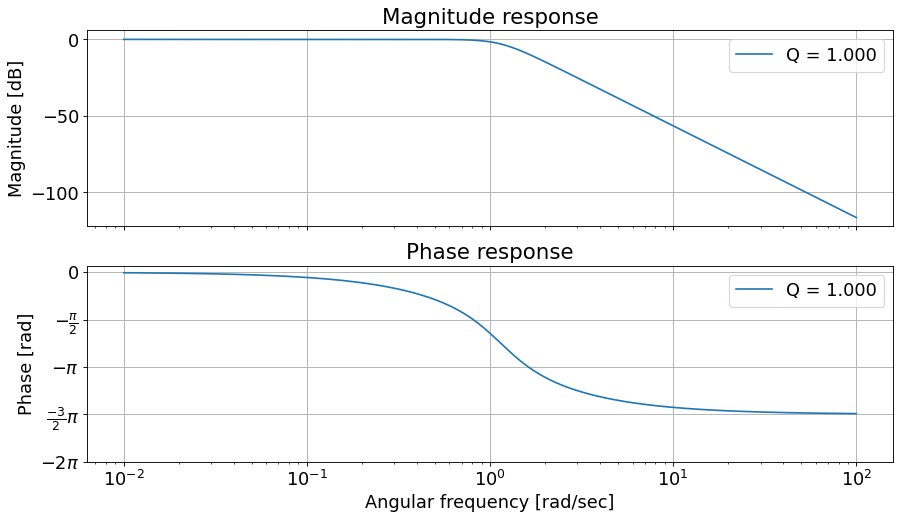

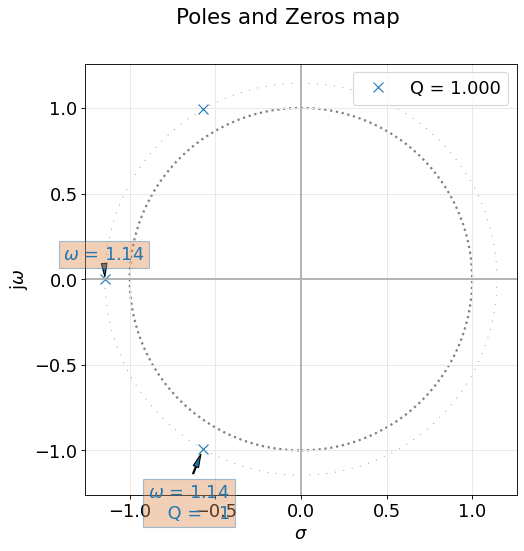

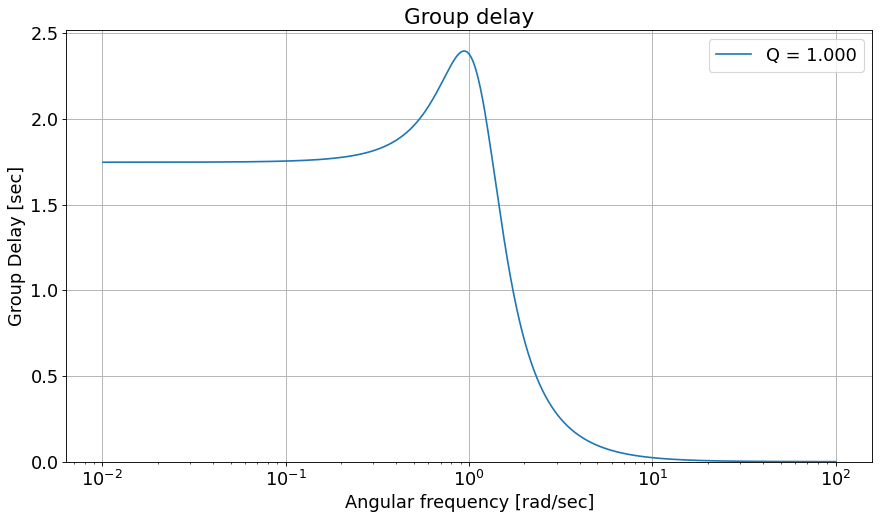

In [7]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

wp = 2 * np.pi * 1500
ws = 2 * np.pi * 3000
Ωws = ws/wp

# Orden del filtro
nn = 5

αmax = 1
e = np.sqrt(10**(αmax/10) - 1) # "epsilon"
Ωwb = wp * e**(-1/nn)

for n in range (1 , 9):
 αminn = 10 * np.log10(1 + (e**2 * Ωws**(2*n)))
# print(αminn)

qq = 1

Z,P,K = sig.buttap(3)
Num,Den = sig.zpk2tf(Z,P,K)
Num_mp,Den_mp = sig.lp2lp(Num,Den, e**(-1/nn))

TF = TransferFunction(Num_mp, Den_mp)
print(TF)

#bodePlot(TF, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

#pzmap(TF, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

#GroupDelay(TF, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))

analyze_sys(TF, sys_name='Q = {:3.3f}'.format(qq))

En estos graficos podremos observar y analizar la $respuesta$ $en$ $frecuencia$ $normalizada$ en un $\omega_0$ de $1.25$ (este valor corresponde a hacer $ε^{(-1/n)}$, siendo n = 3), ademas de observar los polos y ceros de la transferencia calculada previamente. En este caso y como sucede con los filtros de $maxima$ $planicidad$, tenemos 3 polos ubicados en angulos especificos (no son cualquiera estos angulos). En este caso, los polos complejos conjugados se encuentran en $π/3$ y en $-π/3$. El otro es real, al igual que como pasa con cualquier filtro $impar$. 

$La$ $transferencia$ $asociada$ $a$ $estos$ $graficos$ $es:$

$$ T(s) = \frac{V_2}{V_1} = \frac{\omega_0^2}{s^2 + s. \frac{\omega_0}{Q} + \omega_0^2} * \frac{\omega_0}{s + \omega_0}$$

$Donde:$

* $\omega_0 = 1.25$ y $Q = 1$

En esta se puede observar claramente dos filtros $Pasa-Bajos$ en $cascada$, uno de primer orden y otro de segundo orden. Esta transferencia se encuentra normalizada en $w_0 = 1.25$ pero se podria desnormalizar teniendo en cuenta otra S distinta. Esta seria igual a $\frac{Sn}{Ω\omega}$, donde Sn (domino de S normalizado) y Ω$\omega$ (norma de normalizacion de frecuencia). 

$Esta$ $nueva$ $transferencia$ $quedaria:$

$$ T(s) = \frac{V_2}{V_1} = \frac{Ω\omega_0^2}{s^2 + s. \frac{Ω\omega_0}{Q} + Ω\omega_0^2} * \frac{Ω\omega_0}{s + Ω\omega_0}$$

$Donde:$

* $Ω\omega_0 = 2 * \pi * 1500 * 1.25$

Esta ultima sera representada por el grafico proximo de LTspice.

## Circuito LTspice

<img src="./Circuito_3.PNG" align="middle" width="1050" /> 

## Respuesta en frecuencia LTspice

<img src="./Respuesta_Frecuencia_3.PNG" align="middle" width="1000" /> 

<img src="./Valor_3.PNG" align="center" width="300" /> 

El el grafico de LTspice se observa la $respuesta$ $en$ $frecuencia$ $del$ $filtro$ de $maxima$ $planicidad$ calculado previamente. En este se puede ver como se verifica que a $1,5KHz$, la $atenuacion$ es de $1$ $dB$ aproximadamente. Aca se verifica lo pedido por la plantilla. A su vez, tambien se verifica lo calculado en los $PDFS$. Ademas, en una frecuencia de aproximadamente $3KHz$, la atenuacion es de $12,44dB$, cumpliendose aproximadamente lo pedido por la $plantilla$.

## Plantilla

<img src="./Plantilla_3.PNG" align="center" width="300" /> 